# Plotting with pandas

It is time to learn how to plot with our favorite data wrangling tool : pandas 🐼.

We will be using the open data powering https://www.rte-france.com/eco2mix website. 

The pre-processing of the data has been already done for you. All you need is to learn how read pickles from pandas!

![pickles](https://static.wikia.nocookie.net/rickandmorty/images/4/41/Pickle_rick_transparent_edgetrimmed.png)


## Exercise - setting up our (plotting) environment

In [71]:
# load pandas, matplotlib and setup your environment for bigger figures by default (check matplotlib's "rcParams")
import pandas as pd
# Convention d'importation de Matplotlib et de Pyplot
import matplotlib as mpl # <-- 'mpl' est un alias de 'matplotlib'
import matplotlib.pyplot as plt # <-- autre convention pour 'pyplot'

# Une autre convention que vous avez sûrement déjà rencontré:
import numpy as np

plt.rcParams["figure.figsize"] = (15,10)

## Exercise : loading the data from a pickle file

In [72]:
# Load from the pickle file eco2mix
df = pd.read_pickle('data/eco2mix.pkl')
df = df[df.index.year == 2018]
df.sample(100) # take 10 samples at random

,Périmètre,Consommation,Thermique,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques
DateTime,,,,,,,,,,
2018-01-15 00:00:00,Bourgogne-Franche-Comté,2621.0,185.0,NaN,175.0,0.0,94.0,0.0,29.0,2138.0
2018-03-22 19:15:00,Normandie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-22 02:15:00,Hauts-de-France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-29 11:30:00,Nouvelle-Aquitaine,4171.0,23.0,5632.0,66.0,1242.0,69.0,NaN,196.0,-3057.0
2018-08-25 18:15:00,Pays-de-la-Loire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2018-06-10 00:45:00,Bretagne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-22 12:30:00,Grand-Est,5425.0,41.0,10772.0,767.0,441.0,1171.0,0.0,102.0,-7869.0
2018-10-21 08:15:00,Bourgogne-Franche-Comté,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Plotting with Matplotlib


##  Exercise -  Pie chart 

Choose a year in the data, and plot the share for each of the different energy sources, for example like this:

<img src="./img/pie.png" width=400px />


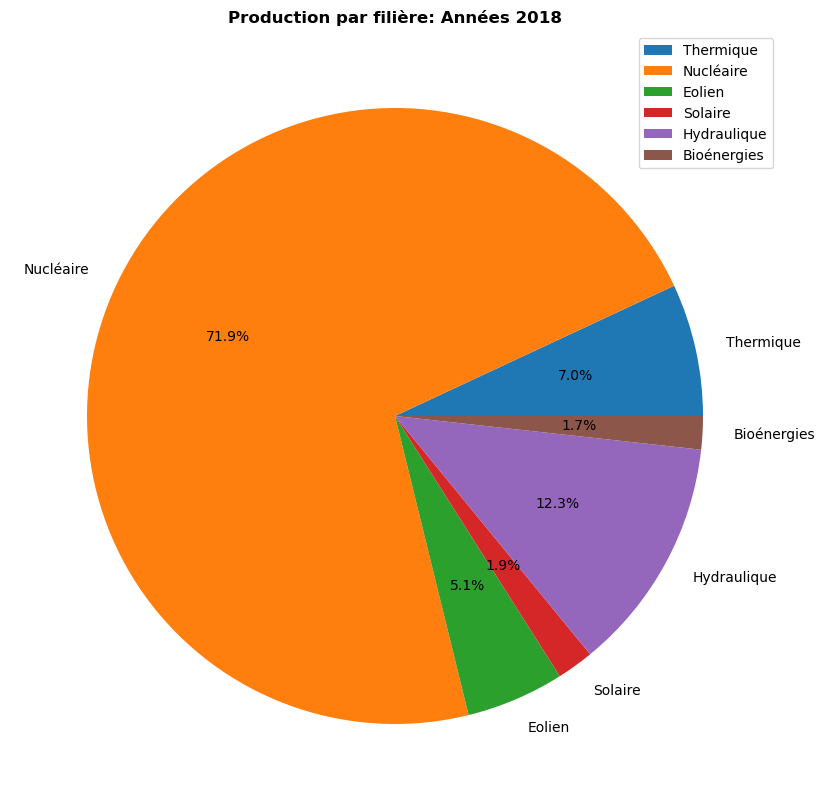

In [93]:
plt.title('Production par filière: Années 2018',fontsize=12,weight='bold')

# Choose a year (ex: 2018) and plot the share that each of the different energy sources has in the total energy production:
df_mieux=df.drop(columns=["Périmètre","Pompage","Ech. physiques"])
df_index = df_mieux[df.index.year == 2018]

col=df_mieux.columns
colonnes=['Thermique', 'Nucléaire', 'Eolien', 'Solaire','Hydraulique', 'Bioénergies']
liste=df_index[colonnes]
#print(liste)

df_index_total=liste.sum()
df_index_total = df_index_total.apply(lambda x : x*100/(df_index_total.sum()))
#print(df_index_total)

#fig, ax = plt.subplots()
#ax.pie(df_index_total,autopct='%1.1f%%', startangle=90)
#plt.setp(ax.pie, color='white', fontweight='bold')
#ax.axis('equal')
#plt.show()

plot = df_index_total.plot(kind='pie',autopct='%1.1f%%',color=['white'])
plt.legend()
plt.show()

## Exercise :  Horizontal Bar

Use a horizontal bar chart instead of a pie to represent the previous data

_Tip: When possible, try to replace pie charts with horizontal bar_

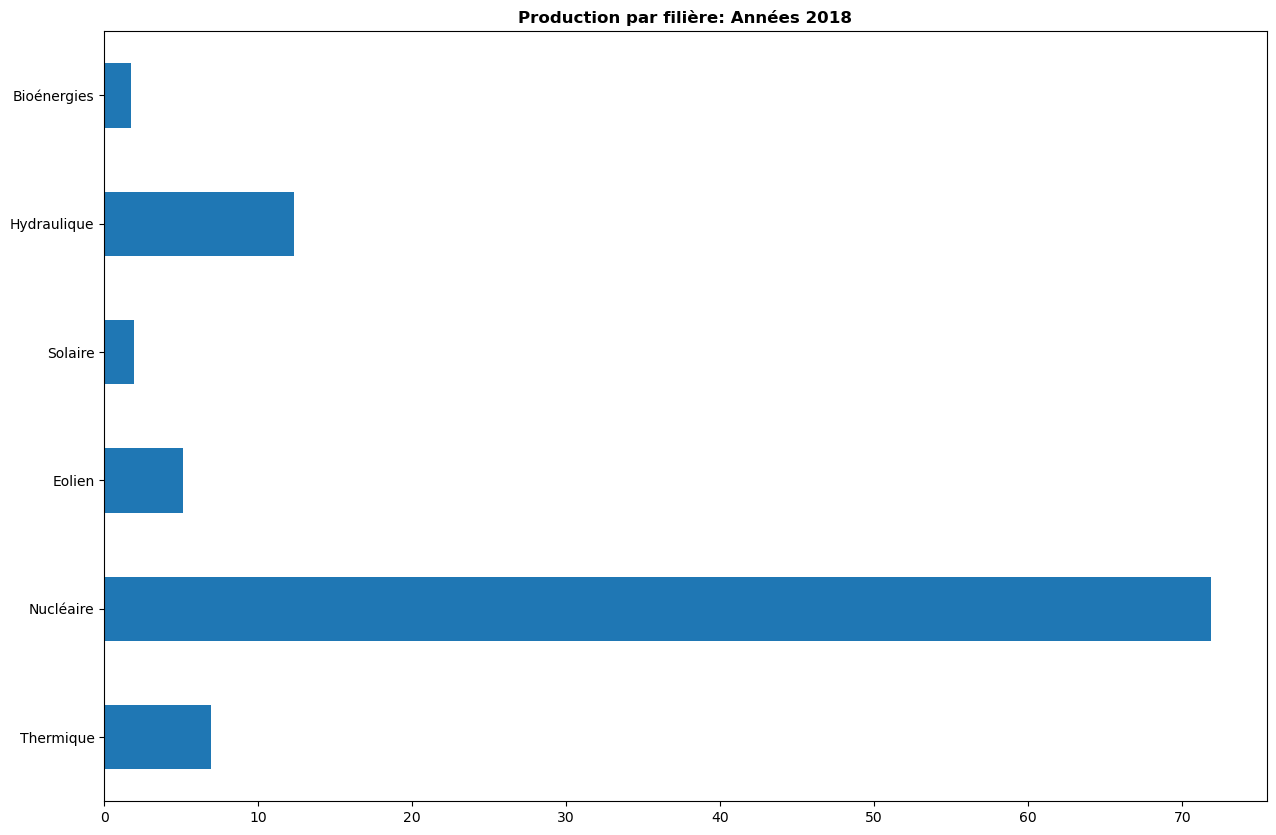

In [102]:
plt.title('Production par filière: Années 2018',fontsize=12,weight='bold')

# Choose a year (ex: 2018) and plot the share that each of the different energy sources has in the total energy production:
df_mieux=df.drop(columns=["Périmètre","Pompage","Ech. physiques"])
df_index = df_mieux[df.index.year == 2018]

col=df_mieux.columns
colonnes=['Thermique', 'Nucléaire', 'Eolien', 'Solaire','Hydraulique', 'Bioénergies']
liste=df_index[colonnes]
#print(liste)

df_index_total=liste.sum()
df_index_total = df_index_total.apply(lambda x : x*100/(df_index_total.sum()))

plot = df_index_total.plot.barh(x='lab', y='val')
plt.show()

## Exercise : Area chart

Go ahead and explore trends in the evolution of the energy production with the help of an area chart

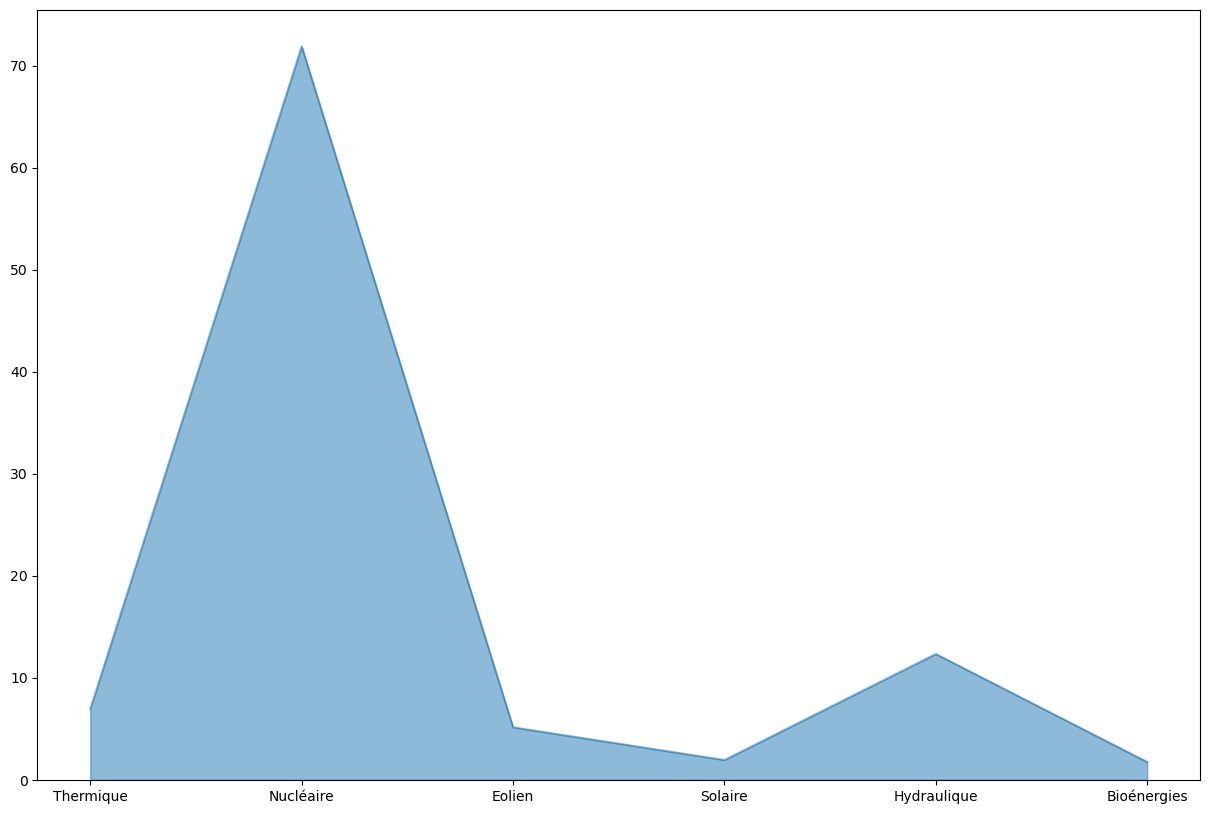

In [124]:
# Explore trends

# Choose a year (ex: 2018) and plot the share that each of the different energy sources has in the total energy production:
df_mieux=df.drop(columns=["Périmètre","Pompage","Ech. physiques"])
df_index = df_mieux[df.index.year == 2018]

col=df_mieux.columns
colonnes=['Thermique', 'Nucléaire', 'Eolien', 'Solaire','Hydraulique', 'Bioénergies']
liste=df_index[colonnes]
#print(liste)

df_index_total=liste.sum()
df_index_total = df_index_total.apply(lambda x : x*100/(df_index_total.sum()))

plot = df_index_total.plot.area(stacked=False)
plt.show()

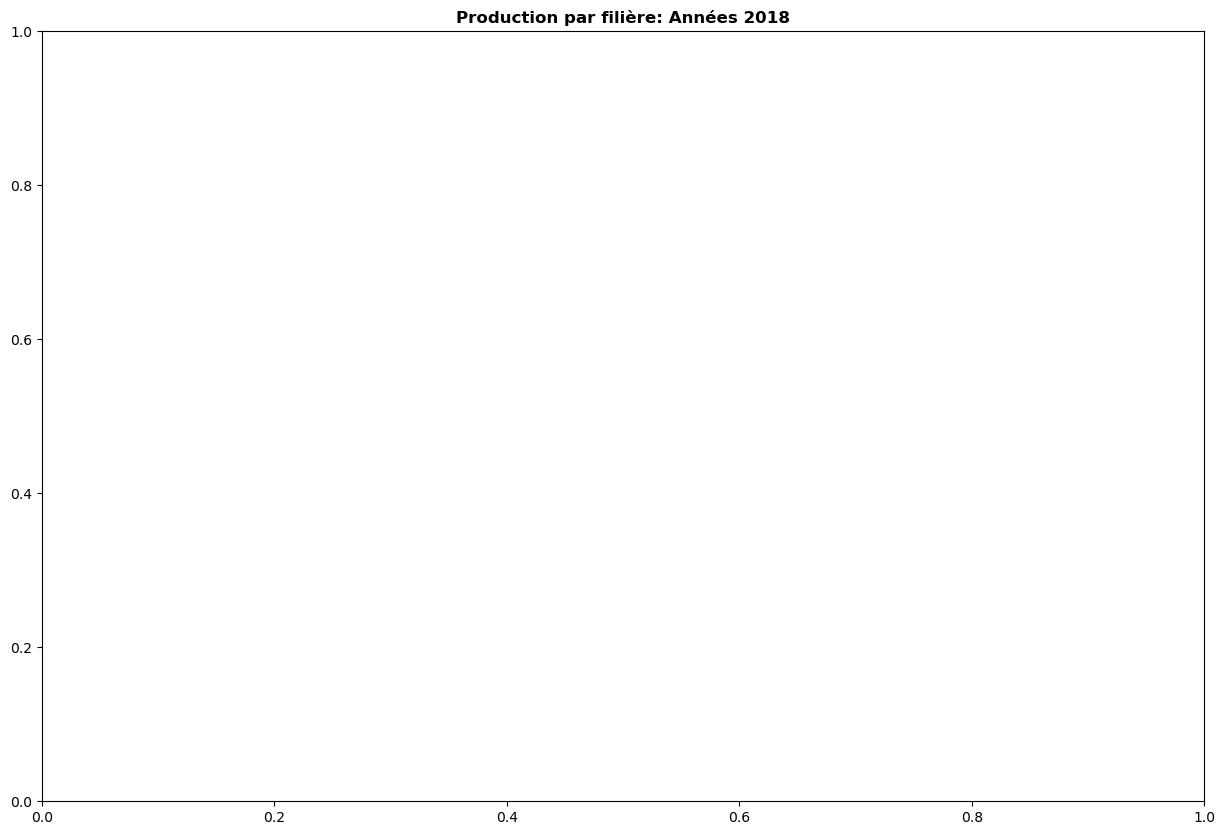

OverflowError: In draw_markers: Exceeded cell block limit

<Figure size 1500x1000 with 1 Axes>

In [126]:
#Graphique à revoir
plt.title('Production par filière: Années 2018',fontsize=12,weight='bold')
df = pd.read_pickle('data/eco2mix.pkl')

df.sample(100) # take 10 samples at random

plot = df.plot.area(stacked=False)
plt.show()

## Exercise : Scatter Plot

Scatter plots are helpful to put in evidence relationships between two variables. Can you find a data relationships and make it visible with a plot ?

_Bonus: try Seaborn's joint plots_

                     Consommation  Thermique  Nucléaire  Eolien  Solaire  \
DateTime                                                                   
2018-01-01 00:00:00        2410.0      164.0        NaN   524.0      0.0   
2018-01-01 00:15:00           NaN        NaN        NaN     NaN      NaN   
2018-01-01 00:30:00        2290.0      158.0        NaN   513.0      0.0   
2018-01-01 00:45:00           NaN        NaN        NaN     NaN      NaN   
2018-01-01 01:00:00        2248.0      160.0        NaN   508.0      0.0   
...                           ...        ...        ...     ...      ...   
2018-12-31 22:45:00           NaN        NaN        NaN     NaN      NaN   
2018-12-31 23:00:00        9354.0      435.0        NaN     1.0      0.0   
2018-12-31 23:15:00           NaN        NaN        NaN     NaN      NaN   
2018-12-31 23:30:00        9163.0      436.0        NaN     1.0      0.0   
2018-12-31 23:45:00           NaN        NaN        NaN     NaN      NaN   

           

ValueError: Boolean array expected for the condition, not object

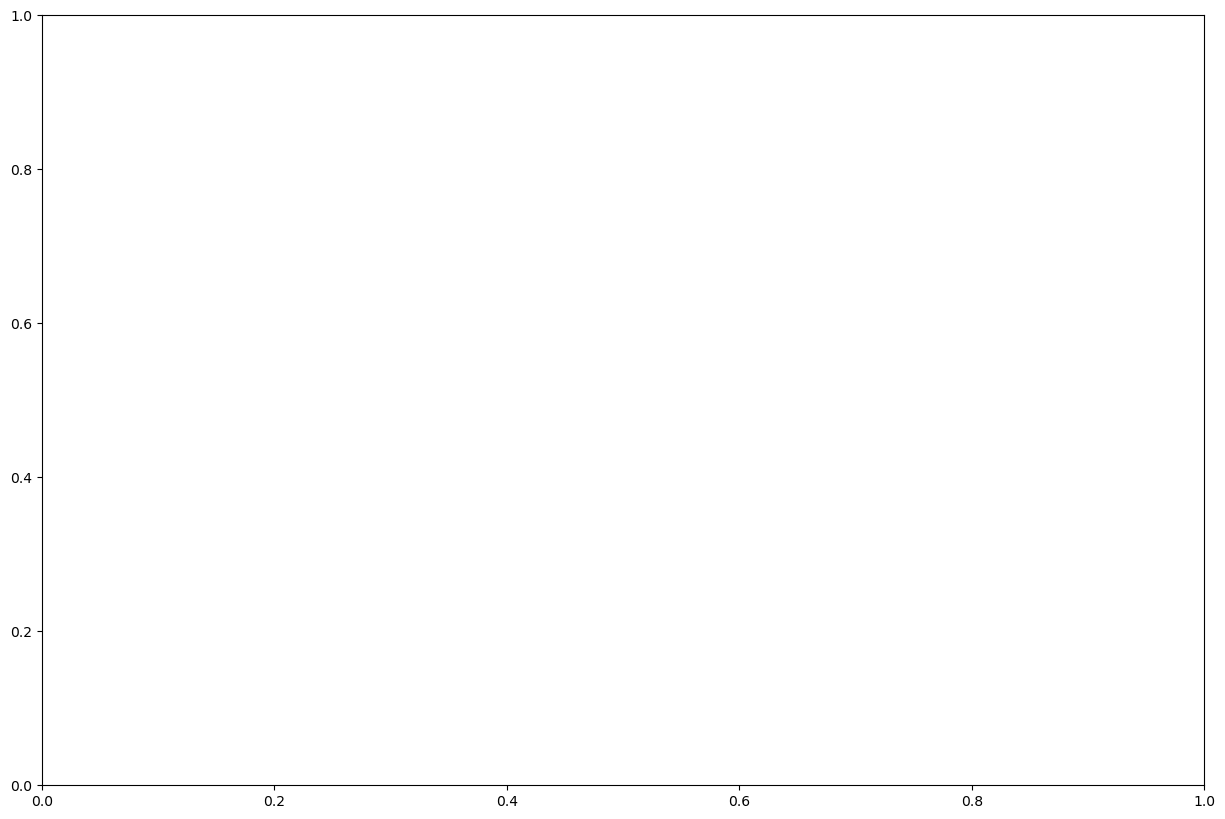

In [141]:
# Explore relationships between variables with a scatter plot
#plt.title('Production par filière: Années 2018',fontsize=12,weight='bold')
df = pd.read_pickle('data/eco2mix.pkl')

df.sample(100) # take 10 samples at random
# Choose a year (ex: 2018) and plot the share that each of the different energy sources has in the total energy production:
df_mieux=df.drop(columns=["Périmètre","Pompage","Ech. physiques"])
df_index = df_mieux[df.index.year == 2018]

print(df_index)
x_column = 'your_x_column_name'
y_column = 'your_y_column_name'

plot = df_index.plot.scatter(x=df_mieux, y=y_column,c='darkblue')


In [ ]:
# let's use the amazing Seaborn library to plot even more insightfull scatter plots:
import seaborn as sns # make sure you installed the library with pip or conda!

# create a joint plot using Seaborn:

#ToDo

# Plotting with Plotly (optional)

In order to go further you can start exploring an alternative ploting library: Plotly.

Two possible ways of using plotly with pandas :
 - https://plotly.com/python/pandas-backend/
 - https://github.com/santosjorge/cufflinks
 - https://coderzcolumn.com/tutorials/data-science/cufflinks-how-to-create-plotly-charts-from-pandas-dataframe-with-one-line-of-code
 
Repeat the previous exercises using the Plotly/Cufflinks backend for Pandas. 

Which library do you prefer ? Which plotly integration works better ?